In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
X = np.random.rand(200,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(200,1)

In [4]:
print(X.shape, y.shape)

(200, 1) (200, 1)


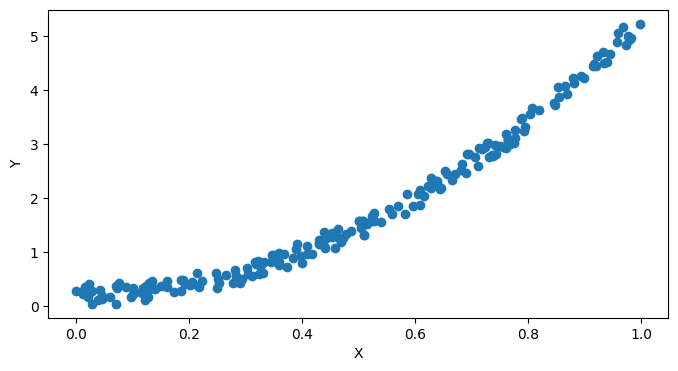

In [5]:
plt.figure(figsize=(8,4))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

degrees = 30

train_scores = []
test_scores = []

for d in range(1, degrees):

    #creates polynomial feature
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    #Standardization
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y_train) # only on train dataset.

    # Calculating performance
    r2_train = model.score(X_poly_scaled, y_train)
    r2_test = model.score(X_test_poly_scaled, y_test)

    train_scores.append(r2_train)
    test_scores.append(r2_test)

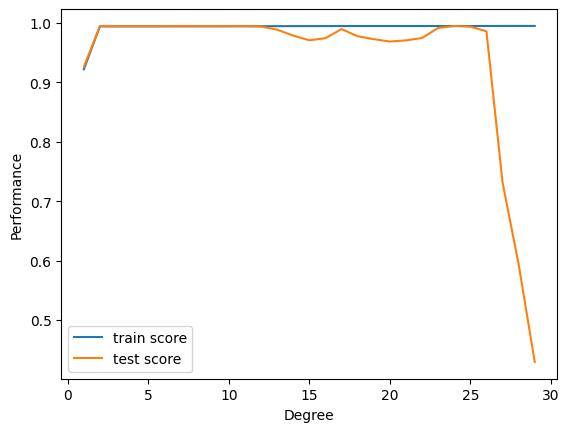

In [8]:
plt.plot(range(1, 30), train_scores, label="train score")
plt.plot(range(1, 30), test_scores, label="test score")
plt.xlabel("Degree")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [9]:
np.argmax(test_scores)

np.int64(23)

# Regularisation

In [10]:
from sklearn import datasets

In [11]:
diabetes = datasets.load_diabetes()

In [12]:
X = diabetes['data']

y = diabetes['target']

In [13]:
X.shape, y.shape

((442, 10), (442,))

In [14]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Transform the features into polynomial features

degree = 5 # very high degree (just for experiment)
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [18]:
X_train_poly.shape

(353, 3003)

In [19]:
X_test_poly.shape

(89, 3003)

In [20]:
# Standardize the polynomial features
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)

In [23]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 68178.0843986425
MSE for train: 1.3939147345019397e-24


In [25]:
print("train r2:",model.score(X_train_poly_scaled, y_train))
print("test r2:",model.score(X_test_poly_scaled, y_test))

train r2: 1.0
test r2: -11.868277020893427


## L2 Regularisation

In [26]:
from sklearn.linear_model import Lasso, Ridge

In [28]:
ridge_model = Ridge(alpha = 500) # linear regression + regularisation

ridge_model.fit(X_train_poly_scaled , y_train)

ridge_predictions = ridge_model.predict(X_test_poly_scaled)

In [29]:
print("train r2:",ridge_model.score(X_train_poly_scaled, y_train))
print("test r2:",ridge_model.score(X_test_poly_scaled, y_test))

train r2: 0.7019477141746822
test r2: 0.38144849647980916


In [30]:
ridge_model.coef_[:30]

array([ 0.        ,  0.94629782, -0.99529889,  3.24717633,  1.5486837 ,
       -0.07452574, -0.50893594, -1.85791237,  1.41416528,  3.33031641,
        1.10257657,  0.53027149,  0.58013163,  0.4022358 ,  0.45634168,
       -0.49384467, -0.7354506 , -0.18280736,  0.20267304,  0.79415803,
        0.96352202, -0.99529889, -0.18411068,  0.48628093,  0.35413882,
        0.27766683,  0.15402138,  0.25649775, -0.02809902, -0.54702395])

## L1 Regularisation

In [31]:
lasso_model = Lasso(alpha=4)
lasso_model.fit(X_train_poly_scaled , y_train)
lasso_predictions = lasso_model.predict(X_test_poly_scaled)

In [32]:
print("train r2:",lasso_model.score(X_train_poly_scaled, y_train))
print("test r2:",lasso_model.score(X_test_poly_scaled, y_test))

train r2: 0.5653399756652482
test r2: 0.5205219318408205


In [33]:
lasso_model.coef_[:30]

array([ 0.        ,  0.        , -1.72098491, 17.56864469,  0.        ,
       -0.        , -0.        , -8.33827216,  0.        , 19.7551467 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.06559912, -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ])

## L1 + L2 Regularisation

In [34]:
from sklearn.linear_model import ElasticNet

In [43]:
ElasticNet_model = ElasticNet(alpha = 3) # linear regression + L1 + L2 regularisation

ElasticNet_model.fit(X_train_poly_scaled , y_train)

ElasticNet_predictions = ElasticNet_model.predict(X_test_poly_scaled)

In [44]:
print("train r2:",ElasticNet_model.score(X_train_poly_scaled, y_train))
print("test r2:",ElasticNet_model.score(X_test_poly_scaled, y_test))

train r2: 0.5952402907945793
test r2: 0.454250460208497
